In [387]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [388]:
#importing the data set
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [389]:
#printing the description of dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [390]:
#creating dataframe
data = pd.DataFrame(boston.data, columns = boston.feature_names)

In [391]:
#target variable
(boston.target)[0:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [392]:
#mutating in dataset
data["TARGET"] = boston.target

In [393]:
#checking head of data
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [394]:
data.shape

(506, 14)

In [395]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  TARGET   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [396]:
#checking the null values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
TARGET     0
dtype: int64

no column has null values

In [397]:
#checking description of data
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


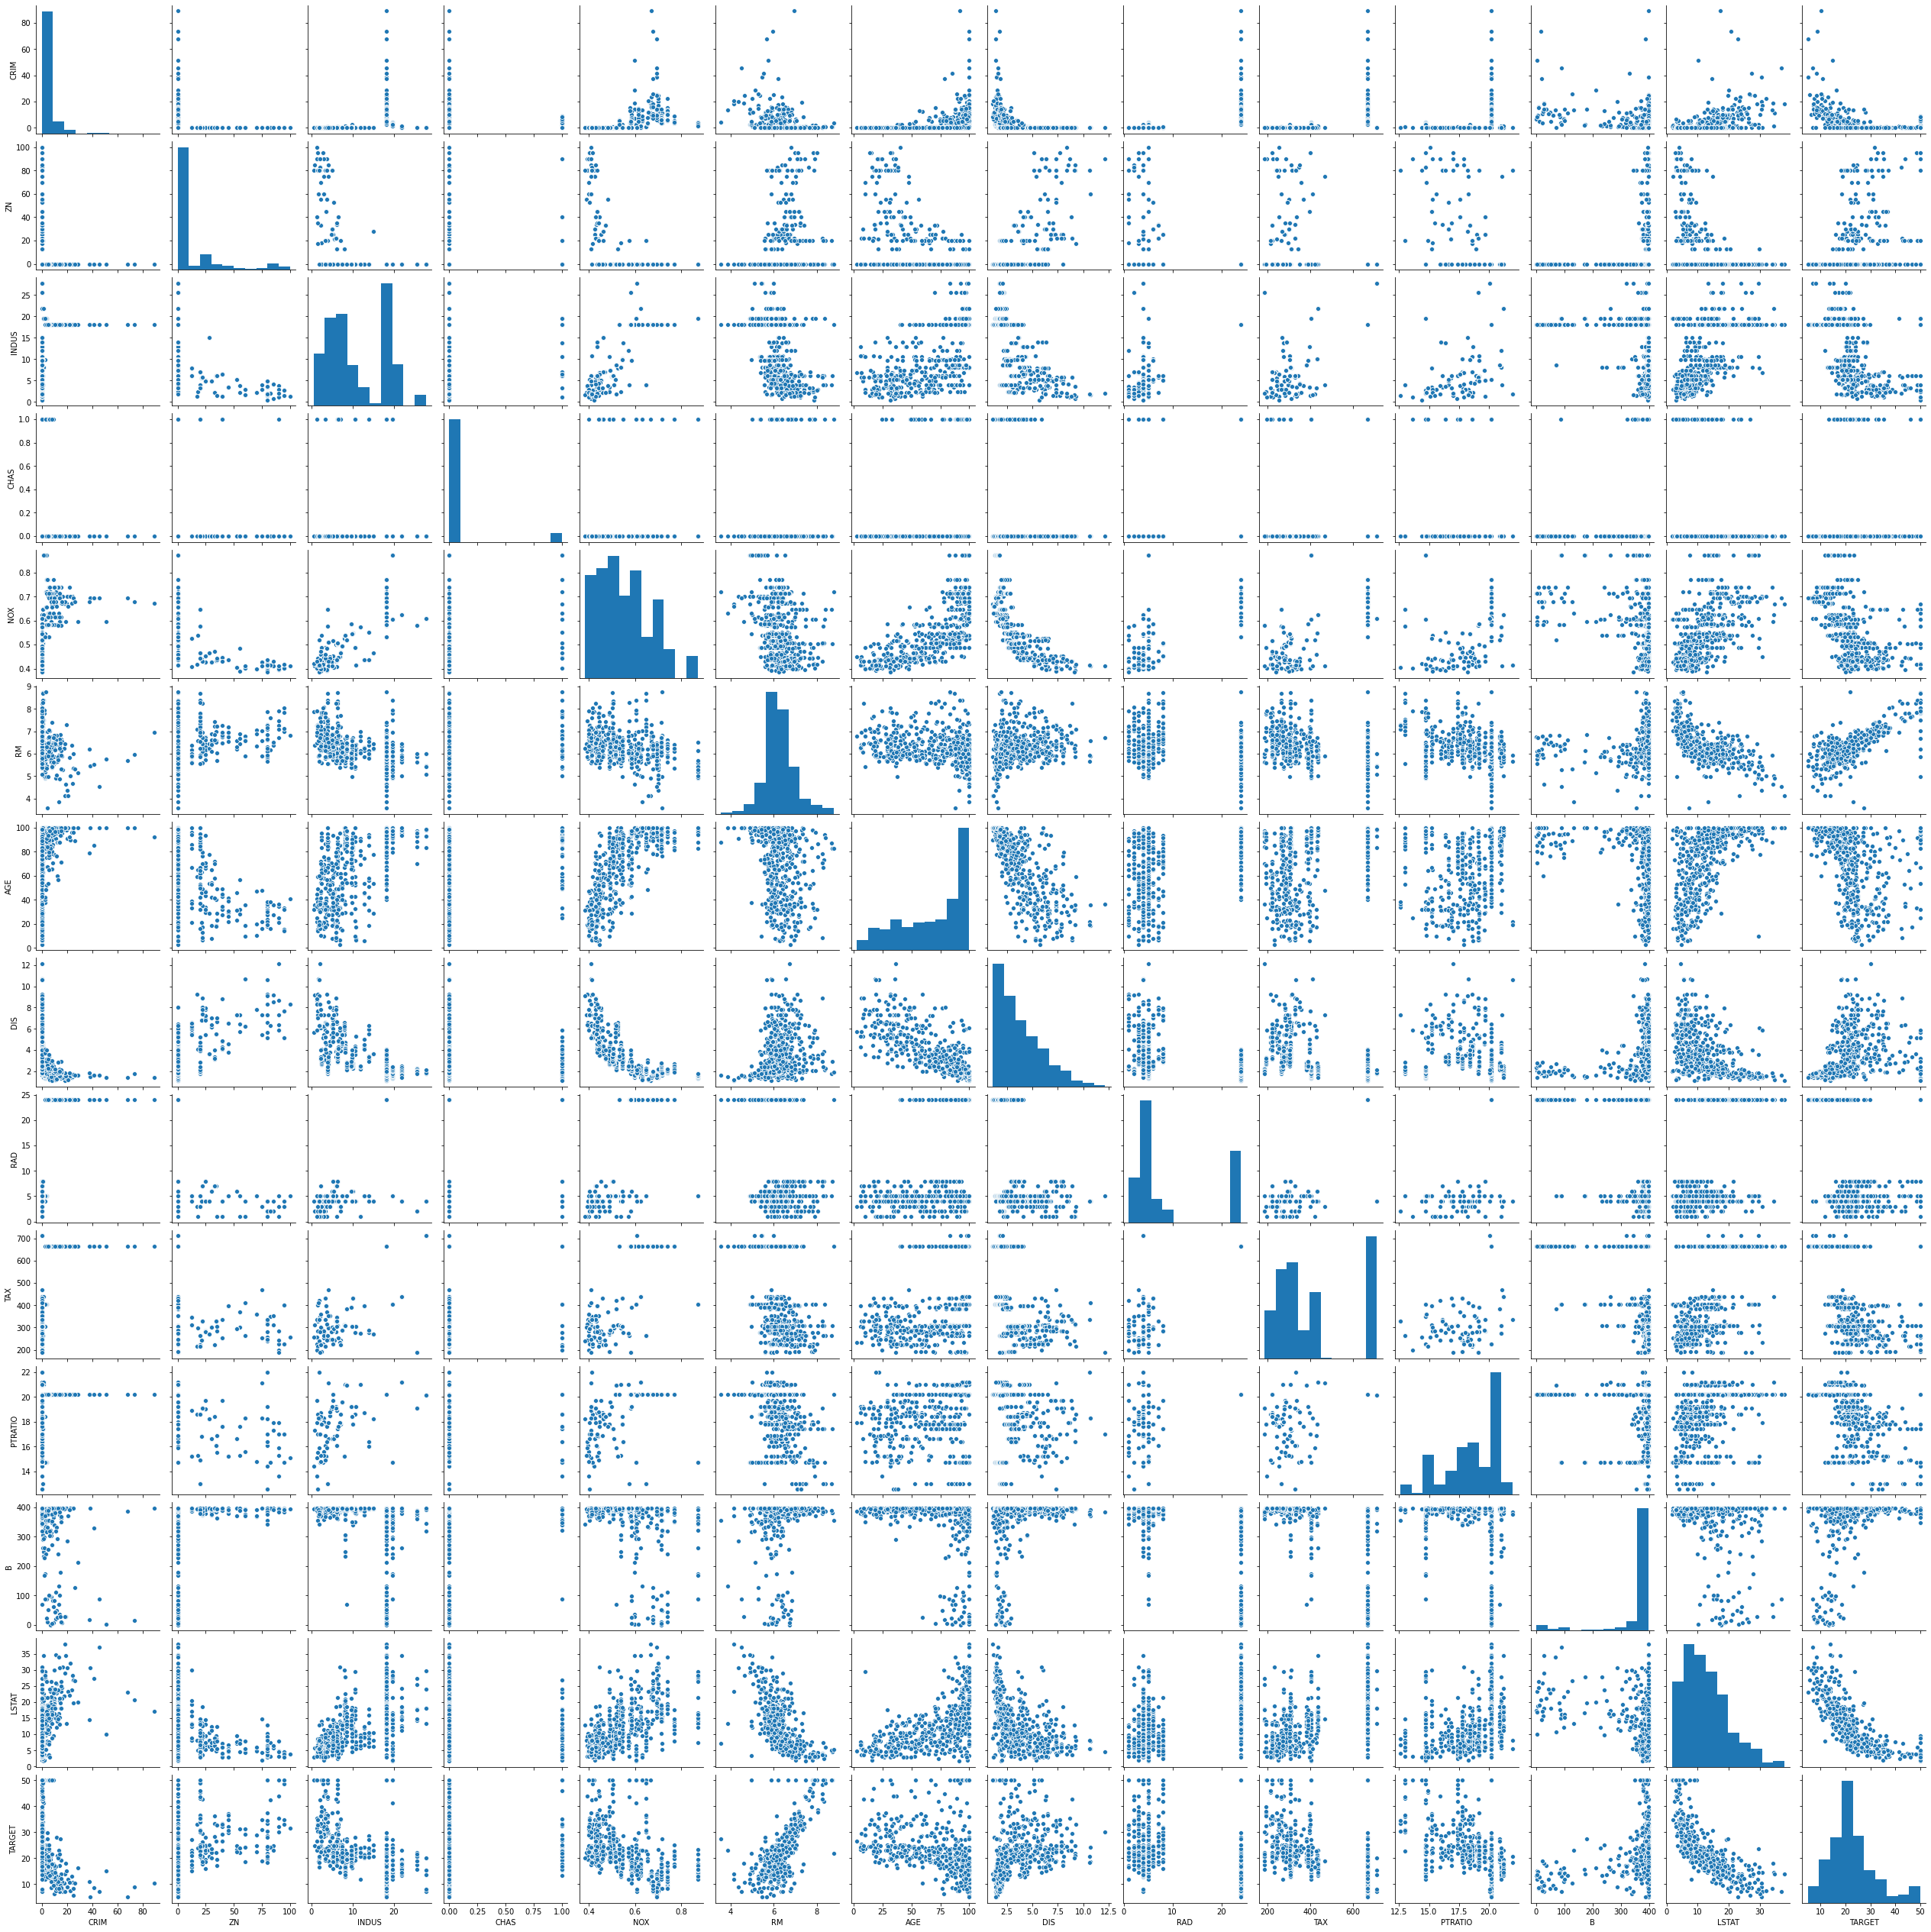

In [398]:
#plotting pair plot to check relationshiop between all variables
sns.pairplot(data)

from the above pair plot it can be observed that variable RM and LSTAT shows liner relationship with Target variables

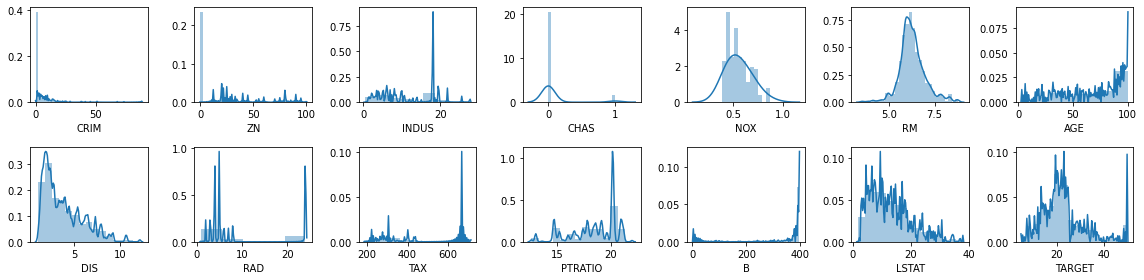

In [399]:
#plotting distribution plot to check distribution pattern of each variable

rows = 2
cols = 7

fig, ax = plt.subplots(nrows= rows, ncols= cols, figsize=(16,4))

col=data.columns
index = 0

for i in range(rows):
    for j in range(cols):
        sns.distplot(data[col[index]],kde_kws={'bw': 0.1}, ax = ax[i][j])
        index = index +1

plt.tight_layout()

In [400]:
# seperating dependent and independent variables
X = data.drop(["TARGET"], axis = 1)
y = data.TARGET

In [401]:
#calculating correlation matrix
corrmat = data.corr()
corrmat

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [402]:
corrmat.index

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'TARGET'],
      dtype='object')

<AxesSubplot:>

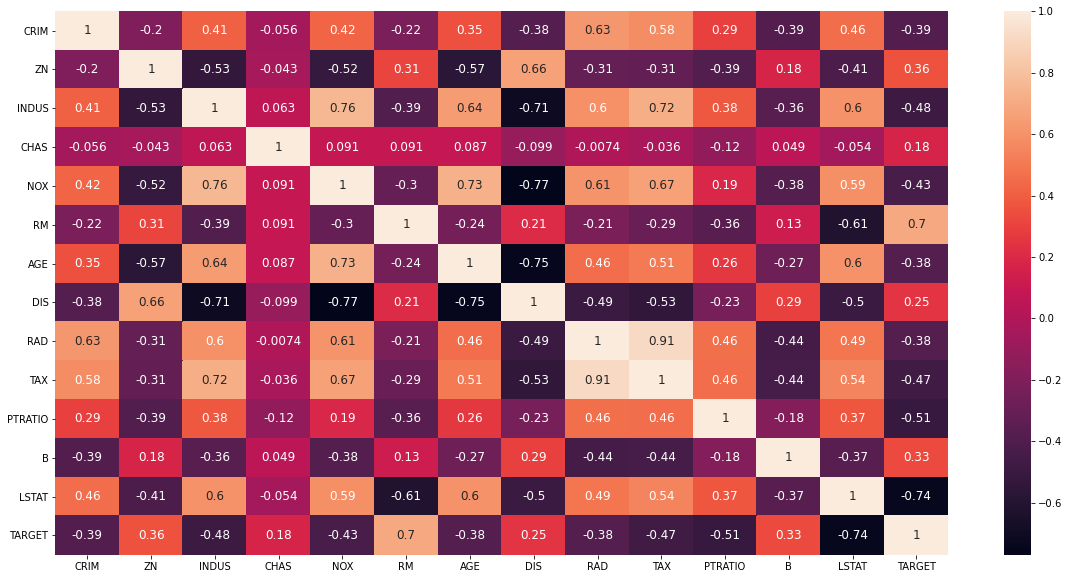

In [403]:
#creating heatmap for correlation matrics data
fig, ax = plt.subplots(figsize = (20,10), facecolor = "w")
sns.heatmap(corrmat, annot=True, annot_kws={"size" : 12})

In [404]:
#from above heatmap we can conclude that variables RM and LSTAT shows correlation with target variable more than 0.7

In [405]:
#importing standard scaler and fitting to X
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [406]:
#importing vif and calculating for X scaled
import statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

In [407]:
# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

In [408]:
vif

,VIF,Features
0,1.792192,CRIM
1,2.298758,ZN
2,3.991596,INDUS
3,1.073995,CHAS
4,4.393720,NOX
5,1.933744,RM
6,3.100826,AGE
7,3.955945,DIS
8,7.484496,RAD
9,9.008554,TAX


In [409]:
#dropping the columns RAD as this columns has vif > 5, and is highly correlated with TAX
data.drop(["RAD"], axis=1, inplace=True)

In [410]:
#Creating a function to check correlation of variables at required thresholds
def getCorrelatedFeature(corrdata,threshold):
    feature = []
    value = []
    
    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index]) > threshold:
            feature.append(index)
            value.append(corrdata[index])
            
    df = pd.DataFrame(data = value, index = feature, columns = ["corr value"])
    return df

In [411]:
#checking variables showing correlation with greater than 0.5
threshold = 0.5
corr_value = getCorrelatedFeature(corrmat["TARGET"], threshold)
corr_value

,corr value
RM,0.695360
PTRATIO,-0.507787
LSTAT,-0.737663
TARGET,1.000000


In [412]:
#variables 'RM', 'PTRATIO', 'LSTAT' shows correlation with greater than 0.5

In [413]:
corr_value.index

Index(['RM', 'PTRATIO', 'LSTAT', 'TARGET'], dtype='object')

In [414]:
#creating correlated data
correlated_data = data[corr_value.index]
correlated_data.head()

,RM,PTRATIO,LSTAT,TARGET
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2


In [415]:
#seperating independent and dependent variables from correlated data
X = correlated_data.drop("TARGET", axis = True)
y = correlated_data.TARGET

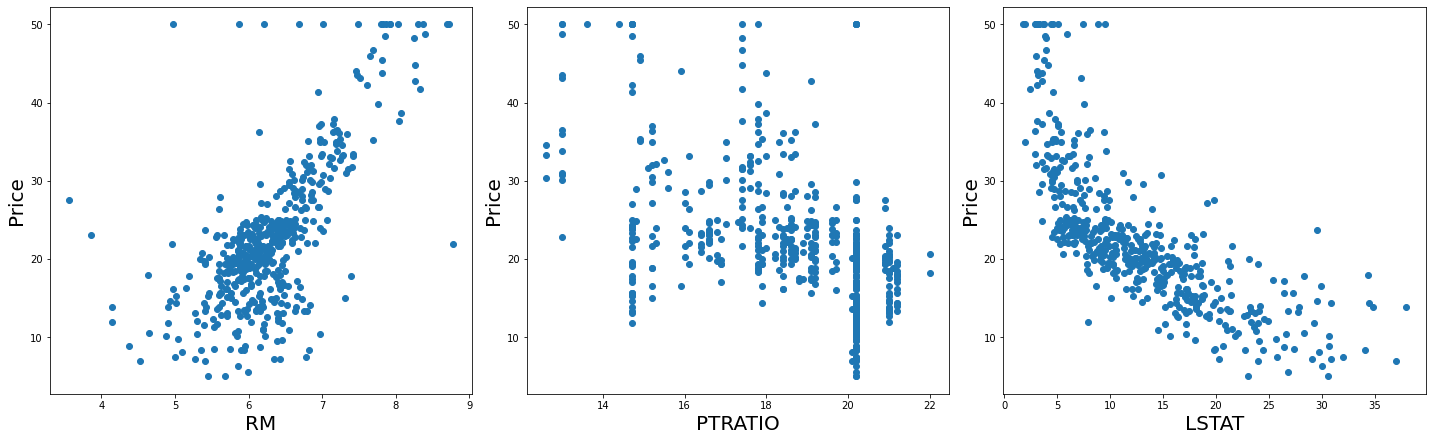

In [416]:
#creating scatter plot for X correlated variables
plt.figure(figsize=(20,30))
plotnumber = 1
for column in X:
    if plotnumber <= 4:
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column], y)
        plt.xlabel(column, fontsize = 20)
        plt.ylabel("Price", fontsize = 20)
    plotnumber = plotnumber + 1
plt.tight_layout()

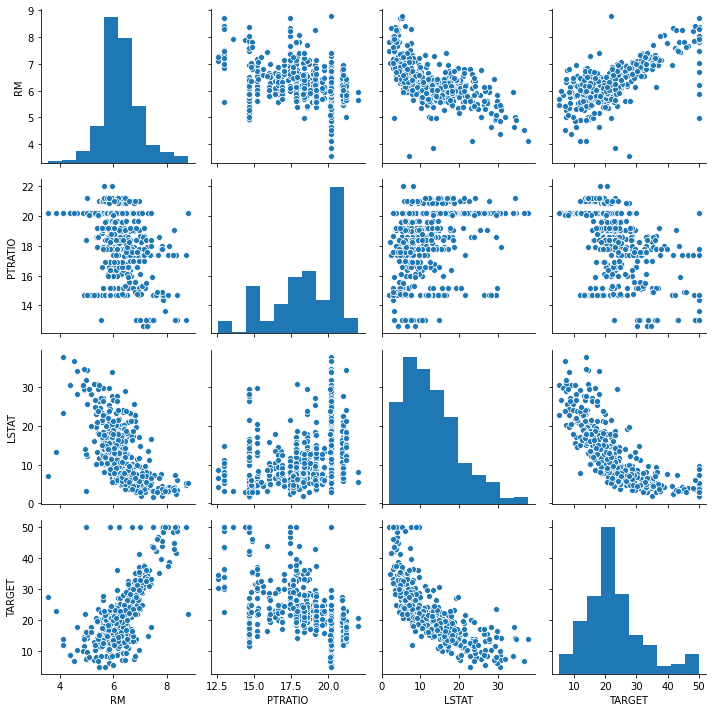

In [417]:
#creating pair plot for correlated data
sns.pairplot(correlated_data)
plt.tight_layout()

<AxesSubplot:>

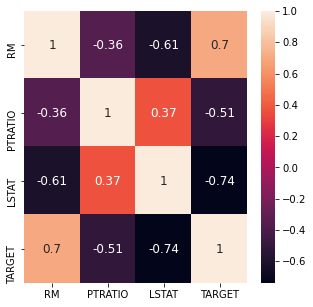

In [418]:
#creating heat map for correlated data
fig, ax = plt.subplots(figsize = (5,5), facecolor = "w")
sns.heatmap(correlated_data.corr(), annot=True, annot_kws={"size" : 12})

In [419]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [420]:
#splitting correlated data into train and test
X_train, X_test, Y_train, Y_test = train_test_split( X, y , test_size = 0.2, random_state = 24 )

In [421]:
#fitting the modle
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [422]:
#checking y predict values
y_predict = lm.predict(X_test)
y_predict

array([19.70010469, 16.17782418, 20.07413099, 19.8262686 , 28.22323767,
       34.00271651, 19.44751266, 16.14076777, 10.31436743, 31.42434767,
       23.37247256, 19.1260565 , 18.63355708, 26.85905212, 20.11344629,
       24.13619   , 28.11666843, 29.77319129, 33.65404152, 27.28291032,
       18.09538917, 26.20241657, 11.24052214, 22.95445209, 19.39823721,
       18.97711375, 31.06008604, 27.38310583, 20.77904041, 22.98937497,
       25.97788408, 19.73206163, 24.84186921, 17.4305779 ,  9.51907644,
       26.73133228, 13.96721563, 21.15308028, 39.57533593, 21.58089643,
       23.32426052, 30.81154961, 18.88404989, 17.80072824, 33.98028247,
        9.06495537, 18.36386297, 23.64417521, 21.93148562, 22.76360232,
       25.94497443, 32.73152499, 40.36935644, 16.30738969, 28.98217412,
       28.95145435, 20.46828896, 20.52074111, 25.37942093, 10.047436  ,
       17.54040982, 17.14288047, 20.96161482, 14.79490471, 24.42796667,
       12.29169735, 24.76109461, 18.65588709, 18.05493265,  4.11

In [423]:
#Checking accuracy of modle
lm.score(X_test,y_test)

0.5777129815828144

In [424]:
#importing R squared
from sklearn.metrics import r2_score

In [425]:
#checking R squared
score = r2_score(y_test,y_predict)
print("Rsqrd:" , score)

Rsqrd: 0.5777129815828144


Regression evaluation metrics:

In [426]:
from sklearn import metrics

In [427]:
print("MAE:", metrics.mean_absolute_error(y_test,y_predict))
print("MSE:" , metrics.mean_squared_error(y_test,y_predict))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

MAE: 3.585798687044497
MSE: 28.603665581627318
RMSE: 5.3482394843188645


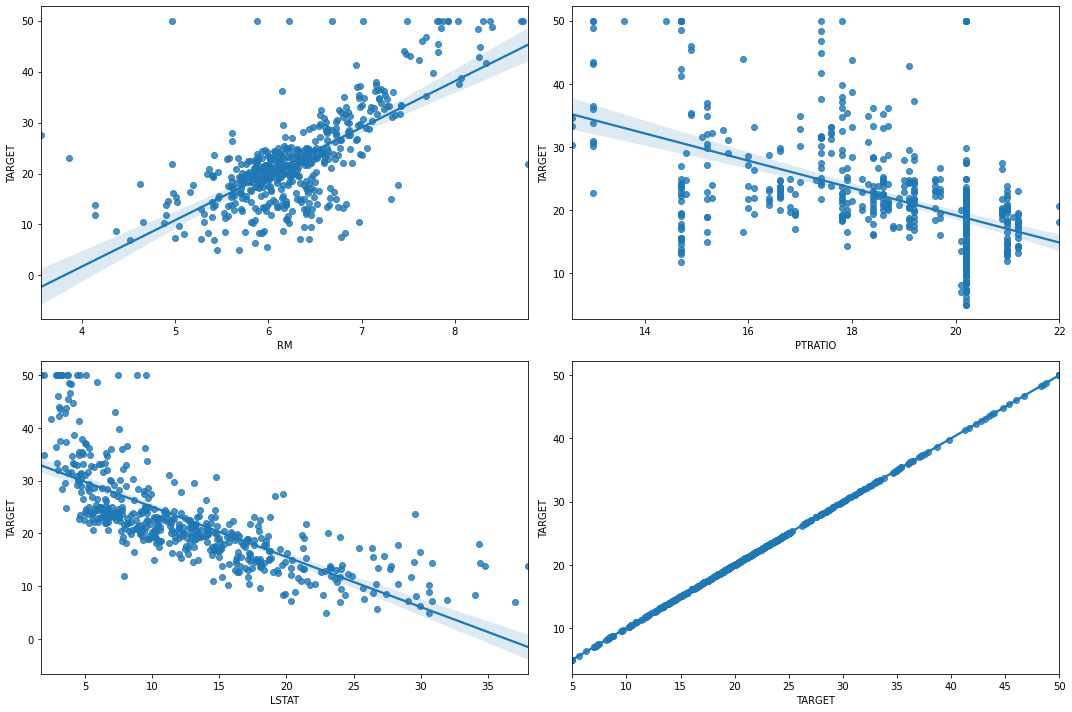

In [455]:
#Creating regression plot
rows = 2
cols = 2
fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize=(15,10))

col = correlated_data.columns
index = 0

for i in range(rows):
    for j in range(cols):
        sns.regplot(x = correlated_data[col[index]], y = correlated_data["TARGET"], ax = ax[i][j])
        index = index +1
    fig.tight_layout()

### cross validation

In [429]:
from sklearn.model_selection import cross_validate

In [430]:
scores = cross_validate(lm,X,y,scoring= "r2",cv = 5, return_train_score= True)

In [431]:
cv_score = scores["test_score"]
print("5 folds CV scores: {}".format(cv_score))
print("Average cross Validation score for 5 folds: {}".format(np.mean(cv_score)))

5 folds CV scores: [ 0.72694149  0.71485697  0.54819014  0.18188973 -0.02186342]
Average cross Validation score for 5 folds: 0.430002983179557


# Alternal method (OLS) orginary least square

In [432]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2


In [433]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'TARGET'],
      dtype='object')

In [434]:
#building model with all the featues
import statsmodels.formula.api as smf
lm1 = smf.ols(formula = 'TARGET ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + TAX + PTRATIO + B + LSTAT'
              ,data = data).fit()

In [435]:
lm1.rsquared

0.7294255414274199

In [436]:
lm1.rsquared_adj

0.7228395505493854

In [437]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TARGET   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     110.8
Date:                Thu, 17 Sep 2020   Prob (F-statistic):          1.92e-131
Time:                        00:50:16   Log-Likelihood:                -1509.5
No. Observations:                 506   AIC:                             3045.
Df Residuals:                     493   BIC:                             3100.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.7594      4.992      5.961      0.000      19.951      39.568
CRIM          -0.0675      0.032     -2.090      0.037      -0.131      -0.004
ZN             0.0397      0.014      2.852      0.005       0.012       0.067
INDUS         -0.0584      0.060     -0.969      0.333      -0.177       0.060
CHAS           3.1144      0.874      3.563      0.000       1.397       4.832
NOX          -15.2618      3.858     -3.956      0.000     -22.842      -7.682
RM             4.1146      0.421      9.772      0.000       3.287       4.942
AGE           -0.0039      0.013     -0.292      0.770      -0.030       0.022
DIS           -1.4902      0.203     -7.323      0.000      -1.890      -1.090
TAX            0.0013      0.002      0.565      0.573      -0.003       0.006
PTRATIO       -0.8387      0.131     -6.398      0.000      -1.096      -0.581
B              0.0084      0.003      3.079      0.002       0.003       0.014
LSTAT         -0.5164      0.052     -9.986      0.000      -0.618      -0.415
==============================================================================
Omnibus:                      189.296   Durbin-Watson:                   1.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              907.772
Skew:                           1.596   Prob(JB):                    7.58e-198
Kurtosis:                       8.733   Cond. No.                     1.46e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Applying polynomial regression

In [438]:
from sklearn.preprocessing import PolynomialFeatures

In [439]:
degree =2
p_features = PolynomialFeatures(degree=degree)
X_train_poly = p_features.fit_transform(X_train)

In [440]:
plm = LinearRegression()

In [441]:
plm.fit(X_train_poly,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [442]:
y_train_pred = plm.predict(X_train_poly)

In [443]:
y_test_pred = plm.predict(p_features.fit_transform(X_test))

In [444]:
#for train model
rmse_train = np.sqrt(metrics.mean_squared_error(Y_train, y_train_pred))
R2_train = metrics.r2_score(Y_train,y_train_pred)

In [445]:
#for test model
rmse_test = np.sqrt(metrics.mean_squared_error(Y_test,y_test_pred))
R2_test = metrics.r2_score(Y_test,y_test_pred)

In [446]:
print("Model performance for Training set at degree-2 is :")
print("-"*50)
print("rmse of training set is : ", rmse_train)
print("Rsqrd for training set is :", R2_train)
print("\n")
print("Model performance for Testing set at degree-2 is :")
print("-"*50)
print("rmse of test set is :", rmse_test)
print("Rsqrd for test set is :", R2_test)

Model performance for Training set at degree-2 is :
--------------------------------------------------
rmse of training set is :  4.08831317431436
Rsqrd for training set is : 0.8110293068318081


Model performance for Testing set at degree-2 is :
--------------------------------------------------
rmse of test set is : 4.471118502866905
Rsqrd for test set is : 0.7048665733447705


#### lets try a few degrees 3 to 20 and observe the RMSE and R2¶
-wrap the above in a function

In [447]:
def poly_function(degrees):
    
    degree_list      = []
    train_rmse_list  = []
    train_r2_list    = []
    test_rmse_list   = []
    test_r2_list     = []
    
    for degree in degrees:
        poly_features = PolynomialFeatures(degree=degree)

        # transforms the existing features to higher degree features.
        X_train_poly = poly_features.fit_transform(X_train)

        # fit the transformed features to Linear Regression
        poly_model = LinearRegression()
        poly_model.fit(X_train_poly, Y_train)

        # predicting on training data-set
        y_train_pred = poly_model.predict(X_train_poly)

        # predicting on test data-set
        y_test_pred = poly_model.predict(poly_features.fit_transform(X_test))

        # evaluating the model on training dataset
        rmse_train = np.sqrt(metrics.mean_squared_error(Y_train, y_train_pred))
        r2_train   = metrics.r2_score(Y_train, y_train_pred)

        # evaluating the model on test dataset
        rmse_test = np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred))
        r2_test   = metrics.r2_score(Y_test, y_test_pred)
    
        degree_list.append(degree)
        train_rmse_list.append(rmse_train)
        train_r2_list.append(r2_train)
        test_rmse_list.append(rmse_test)
        test_r2_list.append(r2_test)
        
    return degree_list, train_rmse_list, train_r2_list, test_rmse_list, test_r2_list
    

In [448]:
degree_list = np.arange(1, 20, 1)

degree_list, train_rmse_list, train_r2_list, test_rmse_list, test_r2_list = poly_function(degree_list)

results= pd.DataFrame({'degrees':   np.array(degree_list), 
                       'train_mse': np.array(train_rmse_list),
                       'train_r2':  np.array(train_r2_list), 
                       'test_mse':  np.array(test_rmse_list),
                       'test_r2':   np.array(test_r2_list)
                      })

In [449]:
results

,degrees,train_mse,train_r2,test_mse,test_r2
0,1,5.185917,0.695941,5.348239,5.777130e-01
1,2,4.088313,0.811029,4.471119,7.048666e-01
2,3,3.858782,0.831653,4.939733,6.397592e-01
3,4,3.657207,0.848781,5.780417,5.067077e-01
4,5,3.466969,0.864104,5.870932,4.911379e-01
5,6,3.290790,0.877565,10.404267,-5.981185e-01
6,7,3.253207,0.880345,18.138349,-3.857150e+00
7,8,2.973310,0.900049,169.284840,-4.220797e+02
8,9,3.012511,0.897396,577.460542,-4.922009e+03
9,10,3.061064,0.894062,2743.199065,-1.110956e+05


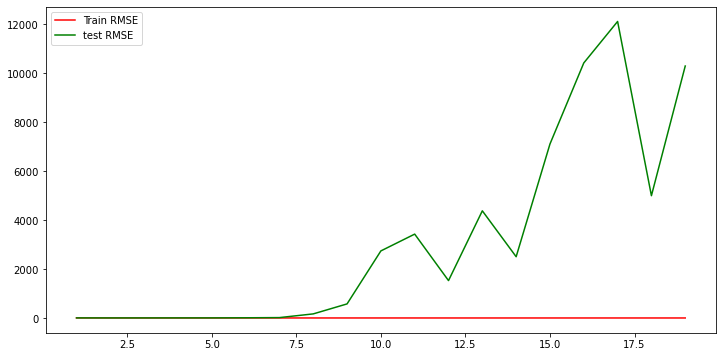

In [450]:
plt.figure(figsize=(12, 6))

# Train MSE
plt.plot(results.degrees, results.train_mse, color='r', label='Train RMSE', alpha=1)

# Test MSE
plt.plot(results.degrees, results.test_mse, color='g', label='test RMSE', alpha=1)

plt.legend();

In [451]:
results = results[results.test_r2>=0]

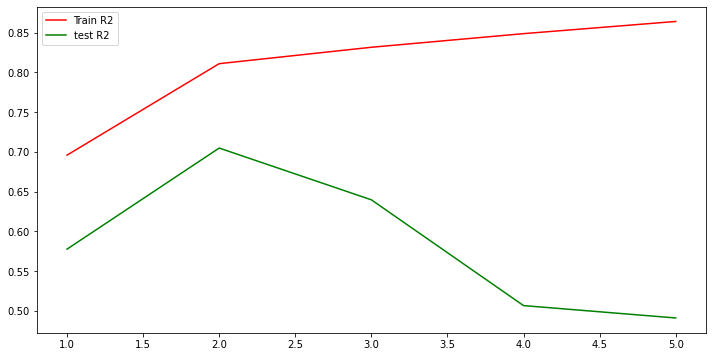

In [452]:
plt.figure(figsize=(12, 6))

# Train R2
plt.plot(results.degrees, results.train_r2, color='r', label='Train R2', alpha=1)

# Test R2
plt.plot(results.degrees, results.test_r2, color='g', label='test R2', alpha=1)

plt.legend();

over fitting for test started after degree 2 so we will choose degree-2